# Subpopulation investigation

> Fill in a module description here

In [40]:
#| default_exp core

In [41]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import svgutils
from svgutils.compose import *
import dabest
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import esploco.plotTools
from esploco.plotTools import setFont
setFont('Helvetica', 6)
plt.style.use('seaborn-colorblind')
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
import pickle
import pandas as pd
import scipy
import numpy as np
import dabest
paperpath = '/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/'
picklepath = paperpath + 'DataforFigures/Behavior/Data/pickles/'
imagepath = paperpath + 'Figures20250212/'
figurepath = imagepath + '/FigureS4/'

# %run '/Users/sangyuxu/Documents/GitHub/Holophenotype5HT/nbs/02_helper/Gdocs API/writepdtogoogledocs.ipynb'
# SPREADSHEET_ID = '1nbr_gWwmOcVY252Tur-fOhx1UDA4IyAfWXCnzwCxGYo'


/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_68760/1358359453.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')
/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_68760/1358359453.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [49]:
def plotcontrast(data, metric, subdatafilename, palette, title, swarm_label ='Total Volume (nL)', swarm_ylim = [-10, 900],order = [0,1,2]):
    subdata = data[['GenoReduced', 'Status','Light', metric]].rename(columns = {'GenoReduced':'Genotype'}).reset_index()
    c = dabest.load(subdata, x = ['Status', 'Genotype'], y =  metric, delta2 = True, experiment = 'Light', x1_level=['Ctrl', 'Test'])
    f = c.mean_diff.plot(contrast_bars_kwargs= {'alpha':.15},  swarm_bars_kwargs={'alpha':.15},
                         raw_marker_size=.4, es_marker_size= 5, swarm_desat = 1,color_col='Genotype', 
                         custom_palette= palette, fig_size=(2, 4), swarm_ylim= swarm_ylim, swarm_label=swarm_label, delta_text = False)
    f.axes[0].set_xticklabels(['C', 'T', 'C', 'T'])
    
    f.axes[0].legend(frameon=False,loc='upper left',bbox_to_anchor=[0.5, 1.05], fontsize= 9, markerscale =.5, )
    # leg = f.axes[0].get_legend()
    # hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
    # hl_dict['_child0'].set_color(palette[subdata['Genotype'].unique()[order[0]]])
    # hl_dict['_child1'].set_color(palette[subdata['Genotype'].unique()[order[1]]])
    # hl_dict['_child2'].set_color(palette[subdata['Genotype'].unique()[order[2]]])
    
    if data.Starvation.unique()[0]==24:
        bgc = 'steelblue'
    else:
        bgc = 'orange'
    f.suptitle(title,  font = 'inter', style='italic',  weight = 'medium', fontsize = 12,color= bgc, y=.97)

    f.axes[1].set_xticklabels(['', 'Off', '', 'On','', r'$\Delta\Delta$'])
    f.axes[2].set_ylabel(r'$\Delta\Delta$')

    f.axes[1].set_ylabel(r'$\Delta$ ' + swarm_label)
    f.axes[1].set_ylabel(r'$\Delta$ ' + swarm_label)
    f.savefig(figurepath+  subdatafilename + '.svg')
    f.savefig(figurepath+  subdatafilename + '.png', dpi = 300)
    subdata.to_csv(figurepath+  subdatafilename + '.csv')
    return f, c



def plot2contrast(data, metric, subdatafilename, palette, title, swarm_label ='Total Volume (nL)', swarm_ylim = [-10, 1200],order = [0,1,2]):
    subdata = data[['GenoReduced', 'Status','Light', metric]].rename(columns = {'GenoReduced':'Genotype'}).reset_index()
    c = dabest.load(subdata, x = 'Status', y =  metric, delta2 = False, idx=['Ctrl', 'Test'])
    f = c.mean_diff.plot(contrast_bars_kwargs= {'alpha':.15},  swarm_bars_kwargs={'alpha':.15},
                         raw_marker_size=.4, es_marker_size= 5, swarm_desat = 1,color_col='Genotype', 
                         custom_palette= palette, fig_size=(1.5, 4), swarm_ylim= swarm_ylim, swarm_label=swarm_label,
                        float_contrast=False, delta_text = False)
    f.axes[0].set_xticklabels(['C', 'T'])
    
    # f.axes[0].legend(frameon=False,bbox_to_anchor=[0.1, 1.10], loc='upper left', fontsize= 9, markerscale =.5, )
    f.axes[0].legend(frameon=False,)
    # leg = f.axes[0].get_legend()
    # hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
    # hl_dict['_child0'].set_color(palette[subdata['Genotype'].unique()[order[0]]])
    # hl_dict['_child1'].set_color(palette[subdata['Genotype'].unique()[order[1]]])
    # hl_dict['_child2'].set_color(palette[subdata['Genotype'].unique()[order[2]]])
    print(data.Starvation.unique())
    if data.Starvation.unique()[0]==24:
        bgc = 'steelblue'
    else:
        bgc = 'orange'
    f.suptitle(title, font = 'inter', style='italic', weight = 'medium',fontsize = 12, color= bgc, y=.97)
    f.axes[1].set_xticklabels(['', 'T - C'])
    f.axes[1].set_ylabel(r'$\Delta$ ' + swarm_label)
    f.savefig(figurepath+  subdatafilename + '.svg')
    f.savefig(figurepath+  subdatafilename + '.png', dpi = 300)
    subdata.to_csv(figurepath+  subdatafilename + '.csv')
    return f, c


In [50]:
figurepath


'/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/Figures20250212//FigureS4/'

In [51]:
TrhCsCh = pd.read_csv(picklepath + 'TrhCsCh_ele.csv').sort_values(by = ['Light', 'Status'])
R50CsCh = pd.read_csv(picklepath + 'R50CsCh_ele.csv').sort_values(by = ['Light', 'Status'])
TrhACR = pd.read_csv(picklepath + 'TrhACRRound2_ele.csv').sort_values(by = ['Light', 'Status'])
R50ACR = pd.read_csv(picklepath + 'R50ACRRound2_ele.csv').sort_values(by = ['Light', 'Status'])



TrhVNCCsCh = pd.read_csv(picklepath + 'TrhVNCCsCh_ele.csv').sort_values(by = ['Light', 'Status'])
TrhVNCACR1 = pd.read_csv(picklepath + 'TrhVNCACR1_ele.csv').sort_values(by = ['Light', 'Status'])
SXVNC1CsCh = pd.read_csv(picklepath + 'SXVNC1CsCh_ele.csv').sort_values(by = ['Light', 'Status'])
SXVNC1ACR1 = pd.read_csv(picklepath + 'SXVNC1ACR1_ele.csv').sort_values(by = ['Light', 'Status'])
SXVNC2CsCh = pd.read_csv(picklepath + 'SXVNC2CsCh_ele.csv').sort_values(by = ['Light', 'Status'])
SXVNC2ACR1 = pd.read_csv(picklepath + 'SXVNC2ACR1_ele.csv').sort_values(by = ['Light', 'Status'])
SXVNC3CsCh = pd.read_csv(picklepath + 'SXVNC3CsCh_ele.csv').sort_values(by = ['Light', 'Status'])
SXVNC3ACR1 = pd.read_csv(picklepath + 'SXVNC3ACR1_ele.csv').sort_values(by = ['Light', 'Status'])
RLTG = pd.read_csv(picklepath + 'RLTG_ele.csv').sort_values(by = ['Light', 'Status'])
TLRG = pd.read_csv(picklepath + 'TLRG_ele.csv').sort_values(by = ['Light', 'Status'])
TrhBrainCsCh = pd.read_csv(picklepath + 'TrhBrainCsCh_ele.csv').sort_values(by = ['Light', 'Status'])
TrhVNCACR1 = TrhVNCACR1.drop(TrhVNCACR1.loc[TrhVNCACR1['Genotype'] == 'empty'].index).reset_index()

for df in [TrhCsCh, TrhACR, RLTG,TLRG, TrhBrainCsCh, TrhVNCCsCh, TrhVNCACR1, SXVNC1CsCh, SXVNC2CsCh, SXVNC1ACR1, SXVNC2ACR1, SXVNC3ACR1, SXVNC3CsCh]:
    df['Volume'] = df['Volume']*1000
    df['Meal Size'] = df['Meal Size']*1000
    df['Feed Speed'] = df['Feed Speed']*1000


In [52]:
RLTG['GenoReduced'] = RLTG.Genotype.replace({'r50h05-lexa; trh-gal4>lexaop-gal80; uas-chrimson':'Trhn-G>Chr/R50H050-L>G80', 'w1118; lexaop-gal80; uas-chrimson':'LexAOp-Gal80; UAS-Chr/w', 'w1118; r50h05-lexa; trh-gal4':'Trhn-G; R50H05-L/w'}).astype('category').cat.set_categories(['Trhn-G>Chr/R50H050-L>G80', 'Trhn-G; R50H05-L/w', 'LexAOp-Gal80; UAS-Chr/w'], ordered=True)
TLRG['GenoReduced'] = TLRG.Genotype.replace({'trh-lexa; r50h05-gal4>lexaop-gal80; uas-chrimson':'Trhn-L>G80/R50H050-G>Chr', 'w1118; uas-chrimson; lexaop-gal80':'LexAOp-Gal80; UAS-Chr/w', 'w1118; trh-lexa; r50h05-gal4':'Trhn-L; R50H05-G/w'}).astype('category').cat.set_categories(['Trhn-L>G80/R50H050-G>Chr', 'Trhn-L; R50H05-G/w', 'LexAOp-Gal80; UAS-Chr/w'], ordered=True)
TrhBrainCsCh['GenoReduced'] = TrhBrainCsCh.Genotype.replace({'trh-gal4>tsh-gal80; uas-cschrimson':'Trhn>Brain-Chr', 'w1118; tsh-gal80; uas-cschrimson':'Brain-Chr/w', 'w1118; trh-gal4':'Trhn/w'}).astype('category').cat.set_categories(['Brain-Chr/w', 'Trhn/w', 'Trhn>Brain-Chr'], ordered=True)
TrhVNCCsCh['GenoReduced'] = TrhVNCCsCh.Genotype.replace({'trh-gal4>uas-vnc-cschrimson':'Trhn>VNC-Chr', 'w1118; uas-vnc-cschrimson':'VNC-Chr/w', 'w1118; trh-gal4':'Trhn/w'}).astype('category').cat.set_categories(['VNC-Chr/w', 'Trhn/w', 'Trhn>VNC-Chr'], ordered=True)
TrhVNCACR1['GenoReduced'] = TrhVNCACR1.Genotype.replace({'trh-gal4>uas-vnc-acr1':'Trhn>VNC-ACR1', 'w1118; uas-vnc-acr1':'VNC-ACR1/w', 'w1118; trh-gal4':'Trhn/w'}).astype('category').cat.set_categories(['VNC-ACR1/w', 'Trhn/w', 'Trhn>VNC-ACR1'], ordered=True)
SXVNC1CsCh['GenoReduced'] = SXVNC1CsCh.Genotype.replace({'trh-ad; vt-gal4.dbd>uas-csch':'SXVNC1>Chr', 'w1118; trh-ad; uas-csch':'Trhn-AD; Chr/w', 'w1118; vt-gal4dbd':'VT042751-DBD/w'}).astype('category').cat.set_categories(['Trhn-AD; Chr/w', 'VT042751-DBD/w', 'SXVNC1>Chr'], ordered=True)
SXVNC1ACR1['GenoReduced'] = SXVNC1ACR1.Genotype.replace({'sxvnc1-gal4>uas-acr1':'SXVNC1>ACR1', 'w1118; uas-acr1':'ACR1/w',  'w1118; sxvnc1-gal4':'SXVNC1/w', 'w1118; sxvnc2-gal4':'SXVNC1/w'}).astype('category').cat.set_categories(['ACR1/w', 'SXVNC1/w', 'SXVNC1>ACR1'], ordered=True)
SXVNC2CsCh['GenoReduced'] = SXVNC2CsCh.Genotype.replace({'sxvnc2-gal4>uas-csch':'SXVNC2>Chr', 'w1118; uas-cschrimson':'Chr/w', 'w1118; sxvnc2-gal4':'SXVNC2/w'}).astype('category').cat.set_categories(['Chr/w', 'SXVNC2/w', 'SXVNC2>Chr'], ordered=True)
SXVNC2ACR1['GenoReduced'] = SXVNC2ACR1.Genotype.replace({'sxvnc2-gal4>uas-acr1':'SXVNC2>ACR1', 'w1118; uas-acr1':'ACR1/w', 'w1118; sxvnc2-gal4':'SXVNC2/w'}).astype('category').cat.set_categories(['ACR1/w', 'SXVNC2/w', 'SXVNC2>ACR1'], ordered=True)
SXVNC3CsCh['GenoReduced'] = SXVNC3CsCh.Genotype.replace({'sxvnc3-gal4>uas-csch':'SXVNC3>Chr', 'w1118; uas-cschrimson':'Chr/w','w1118;uas-cschrimson':'Chr/w', 'trh-gal4; w1118': 'SXVNC3/w', 'w1118; sxvnc3-gal4':'SXVNC3/w'}).astype('category').cat.set_categories(['Chr/w', 'SXVNC3/w', 'SXVNC3>Chr'], ordered=True)
SXVNC3ACR1['GenoReduced'] = SXVNC3ACR1.Genotype.replace({'sxvnc3-gal4>uas-acr1':'SXVNC3>ACR1', 'w1118; uas-acr1':'ACR1/w', 'w1118; sxvnc3-gal4':'SXVNC3/w'}).astype('category').cat.set_categories(['ACR1/w', 'SXVNC3/w', 'SXVNC3>ACR1'], ordered=True)

RLTGpalette = {'Trhn-G>Chr/R50H050-L>G80':'orangered', 'LexAOp-Gal80; UAS-Chr/w':'gray', 'Trhn-G; R50H05-L/w':'k'}
TLRGpalette = {'Trhn-L>G80/R50H050-G>Chr':'orangered', 'LexAOp-Gal80; UAS-Chr/w':'gray', 'Trhn-L; R50H05-G/w':'k'}
TrhBrainCsChpalette = {'Trhn>Brain-Chr':'orangered', 'Brain-Chr/w':'gray', 'Trhn/w':'k'}
TrhVNCCsChpalette = {'Trhn>VNC-Chr':'orangered', 'VNC-Chr/w':'gray', 'Trhn/w':'k'}
TrhVNCACRpalette = {'Trhn>VNC-ACR1':'seagreen', 'VNC-ACR1/w':'gray', 'Trhn/w':'k'}
SXVNC1CsChpalette = {'SXVNC1>Chr':'orangered', 'Trhn-AD; Chr/w':'gray', 'VT042751-DBD/w':'k'}
SXVNC1ACR1palette = {'SXVNC1>ACR1':'seagreen', 'ACR1/w':'gray', 'SXVNC1/w':'k'}
SXVNC2CsChpalette = {'SXVNC2>Chr':'orangered', 'Chr/w':'gray', 'SXVNC2/w':'k'}
SXVNC2ACR1palette = {'SXVNC2>ACR1':'seagreen', 'ACR1/w':'gray', 'SXVNC2/w':'k'}
SXVNC3CsChpalette = {'SXVNC3>Chr':'orangered', 'Chr/w':'gray', 'SXVNC3/w':'k'}
SXVNC3ACR1palette = {'SXVNC3>ACR1':'seagreen', 'ACR1/w':'gray', 'SXVNC3/w':'k'}


trhacrpalette = {'Trhn>ACR1':'seagreen', 'ACR1/w':'gray', 'Trhn/w':'k'}
r50acrpalette = {'R50H05>ACR1':'seagreen', 'ACR1/w':'gray', 'R50H05/w':'k'}

In [53]:
TLRG['GenoReduced'].unique()

['LexAOp-Gal80; UAS-Chr/w', 'Trhn-L; R50H05-G/w', 'Trhn-L>G80/R50H050-G>Chr']
Categories (3, object): ['Trhn-L>G80/R50H050-G>Chr' < 'Trhn-L; R50H05-G/w' < 'LexAOp-Gal80; UAS-Chr/w']

/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 10.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


[0]


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 26.2% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 47.5% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


[24]


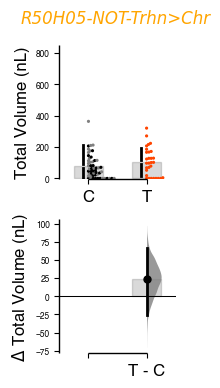

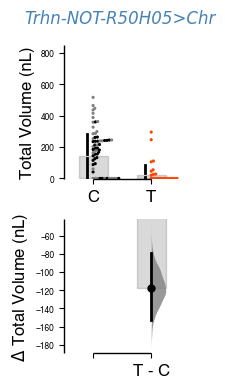

In [54]:
RLTGTLRGpalette = {'Trhn>Chr/R50H050>G80':'orangered', 'LexAOp-Gal80; UAS-Chr/w':'gray', 'Trhn-G; R50H05-L/w':'k', 'Trhn>G80/R50H050>Chr':'orangered', 'Trhn-L; R50H05-G/w':'k' }

RLTG['Light'] = 'RLTG'
TLRG['Light'] = 'TLRG'
RLTGTLRG = pd.concat([RLTG, TLRG], axis = 0)
# fTLRGRLTg_Vcontrast, TLRGRLTg_Vcontrast = plotcontrast(RLTGTLRG, 'Volume', 'TLRGRLTG_Vcontrast', palette = RLTGTLRGpalette, swarm_ylim = [-5, 200],  title= 'Trh and R50H05 Intersection Starved')
fTLRG_Vcontrast, TLRG_Vcontrast = plot2contrast(TLRG, 'Volume', 'TLRG_Vcontrast', swarm_ylim = [-5, 850], palette = TLRGpalette, title= 'R50H05-NOT-Trhn>Chr')
fRLTG_Vcontrast, RLTG_Vcontrast = plot2contrast(RLTG, 'Volume', 'RLTG_Vcontrast', swarm_ylim = [-5, 850], palette = RLTGpalette, title= 'Trhn-NOT-R50H05>Chr')

# order = [1,2,0]
# handles = TLRG.GenoReduced.unique().to_list()
# fTLRG_Vcontrast.axes[0].legend([handles[2-i] for i in order], frameon=False,loc='right', bbox_to_anchor=[1.35, 0.5],fontsize= 12, markerscale = 1, edgecolor = "inherit")
# leg = fTLRG_Vcontrast.axes[0].get_legend()
# hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
# hl_dict['_child0'].set_color(TLRGpalette['Trhn-L; R50H05-G/w'])
# hl_dict['_child1'].set_color(TLRGpalette['LexAOp-Gal80; UAS-Chr/w'])
# hl_dict['_child2'].set_color(TLRGpalette['Trhn>G80/R50H050>Chr'])

# print(fTLRG_Vcontrast.axes[0].get_legend().legendHandles
     # )







# # fTLRG_Vcontrast.axes[0].legend()
# RLTG_Vcontrast_table = make_delta_results(RLTG_Vcontrast, 'Trhn-Gal4; R50H05-LexA/w | LexAOp-Gal80; UAS-Chr/w', 'Trhn>Chr/R50H050>G80')
# write_results_table(SPREADSHEET_ID, 'Figure S4A Trhn-NOT-R50H05>Chr Volume', RLTG_Vcontrast_table, sheet = 'Figure S4', starting_row = None)
# TLRG_Vcontrast_table = make_delta_results(TLRG_Vcontrast, 'Trhn-LexA; R50H05-Gal4/w | LexAOp-Gal80; UAS-Chr/w', 'Trhn>G80/R50H050>Chr')
# write_results_table(SPREADSHEET_ID, 'Figure S4B R50H05-NOT-Trhn>Chr Volume', TLRG_Vcontrast_table, sheet = 'Figure S4', starting_row = None)


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 19.5% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 4.5% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


61


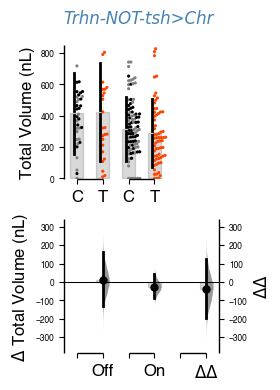

In [ ]:
fTrhBrain_Vcontrast, TrhBrain_Vcontrast = plotcontrast(TrhBrainCsCh, 'Volume', 'TrhBrainCsCh_Vcontrast',  swarm_ylim = [-5, 850], palette = TrhBrainCsChpalette, title= 'Trhn-NOT-tsh>Chr')
# fTrhBrain_MSVcontrast, TrhBrain_MScontrast = plotcontrast(TrhBrainCsCh, 'Meal Size', 'TrhBrainCsCh_MScontrast', palette = TrhBrainCsChpalette, swarm_ylim = [-5, 210], swarm_label = 'Meal Size (nL)', title= 'Trh-NOT-tsh>Chr')
# fTrhBrain_Spcontrast, TrhBrain_Spcontrast = plotcontrast(TrhBrainCsCh, 'Speed', 'TrhBrainCsCh_SPcontrast', swarm_label = 'Speed (mm/s)',swarm_ylim = [-.5, 10], palette = TrhBrainCsChpalette, title= 'Trh-NOT-tsh>Chr')
TrhBrain_Vcontrast_table = make_delta2_results(TrhBrain_Vcontrast, 'Trhn-Gal4/w | tsh-Gal80, UAS-Chr/w', 'Trhn>Chr/tsh>G80')
# write_results_table(SPREADSHEET_ID, 'Figure S4C Trhn-NOT-tsh>Chr Volume', TrhBrain_Vcontrast_table, sheet = 'Figure S4', starting_row = None)


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 31.7% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 43.2% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


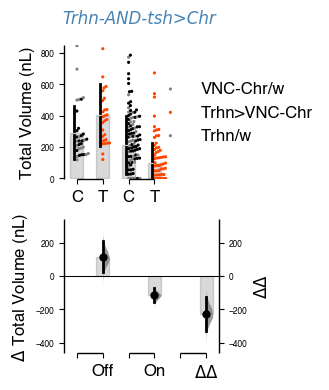

In [56]:
fTrhVNCCsCh_Vcontrast, TrhVNCCsCh_Vcontrast = plotcontrast(TrhVNCCsCh,'Volume', 'TrhVNCCsCh_Vcontrast', swarm_ylim = [-5, 850], palette = TrhVNCCsChpalette, title= 'Trhn-AND-tsh>Chr')
# fTrhVNCCsCh_MScontrast, TrhVNCCsCh_MScontrast = plotcontrast(TrhVNCCsCh, 'Meal Size', 'TrhVNCCsCh_MScontrast', palette = TrhVNCCsChpalette, swarm_label = 'Meal Size (nL)',swarm_ylim = [-5, 210], title= 'Trh-AND-tsh>Chr')
# fTrhVNCCsCh_Spcontrast, TrhVNCCsCh_Spcontrast = plotcontrast(TrhVNCCsCh, 'Speed', 'TrhVNCCsCh_SPcontrast', swarm_label = 'Speed (mm/s)',swarm_ylim = [-.5, 10], palette = TrhVNCCsChpalette, title= 'Trh-AND-tsh>Chr')

# TrhVNCCsCh_Vcontrast_table = make_delta2_results(TrhVNCCsCh_Vcontrast, 'Trhn-Gal4/w | UAS-VNC-Chr/w', 'Trhn-VNC>Chr')
# write_results_table(SPREADSHEET_ID, 'Figure S4D Trhn-AND-tsh>Chr Volume', TrhVNCCsCh_Vcontrast_table, sheet = 'Figure S4', starting_row = None)


order = [2, 0, 1]
handles = TrhVNCCsCh.GenoReduced.unique().to_list()
leg = fTrhVNCCsCh_Vcontrast.axes[0].get_legend()

fTrhVNCCsCh_Vcontrast.axes[0].legend([handles[2-i] for i in order], frameon=False,loc='right', bbox_to_anchor=[1.7, 0.5], fontsize= 12, markerscale = 1, edgecolor = "inherit")
# hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
# hl_dict['_child0'].set_color('k')
# hl_dict['_child1'].set_color('gray')
# hl_dict['_child2'].set_color('orangered')


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 17.6% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 15.8% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 32.7% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 2.6% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools

66
71


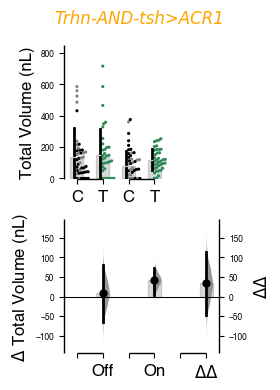

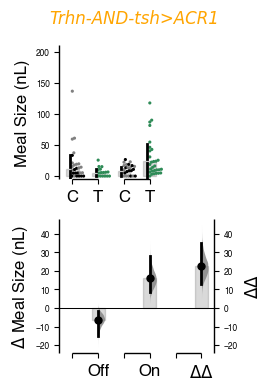

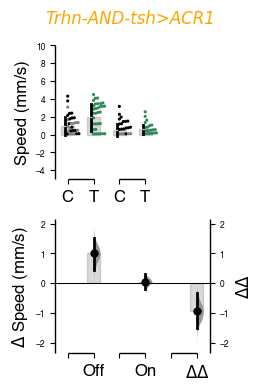

In [ ]:
fTrhVNCACR_Vcontrast, TrhVNCACR_Vcontrast = plotcontrast(TrhVNCACR1, 'Volume', 'TrhVNCACR1_Vcontrast',  swarm_ylim = [-5, 850],palette = TrhVNCACRpalette, title= 'Trhn-AND-tsh>ACR1')
fTrhMSNCACR_MScontrast, TrhVNCACR_MScontrast = plotcontrast(TrhVNCACR1, 'Meal Size', 'TrhVNCACR1_MScontrast', swarm_label = 'Meal Size (nL)',  swarm_ylim = [-5, 210], palette = TrhVNCACRpalette, title= 'Trhn-AND-tsh>ACR1')
fTrhMSNCACR_Spcontrast, TrhVNCACR_Spcontrast = plotcontrast(TrhVNCACR1, 'Speed', 'TrhVNCACR1_Spcontrast', swarm_label = 'Speed (mm/s)',swarm_ylim = [-5, 10], palette = TrhVNCACRpalette, title= 'Trhn-AND-tsh>ACR1')



TrhVNCACR_Vcontrast_table = make_delta2_results(TrhVNCACR_Vcontrast, 'Trhn-Gal4/w | UAS-VNC-ACR1/w', 'Trhn-VNC>ACR1')
# write_results_table(SPREADSHEET_ID, 'Figure S4E Trhn-AND-tsh>ACR1 Volume', TrhVNCACR_Vcontrast_table, sheet = 'Figure S4', starting_row = None)

TrhVNCACR_MScontrast_table = make_delta2_results(TrhVNCACR_MScontrast, 'Trhn-Gal4/w | UAS-VNC-ACR1/w', 'Trhn-VNC>ACR1')
# write_results_table(SPREADSHEET_ID, 'Figure S4F Trhn-AND-tsh>ACR1 Meal Size', TrhVNCACR_MScontrast_table, sheet = 'Figure S4', starting_row = None)



/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 5.9% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 32.7% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 20.6% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 36.5% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools

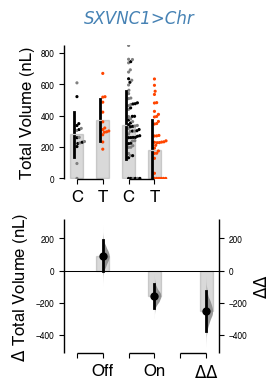

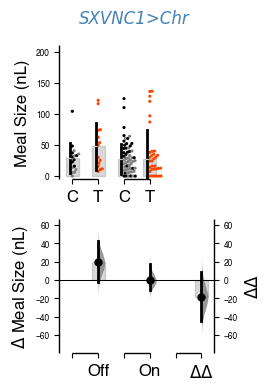

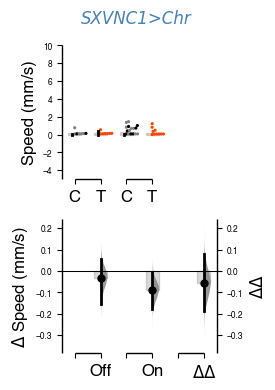

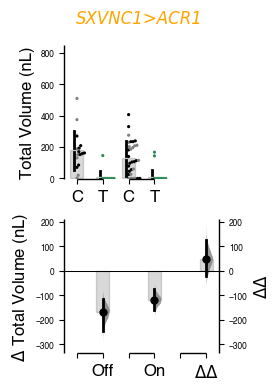

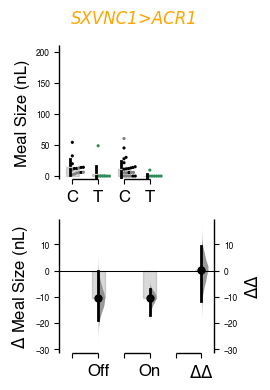

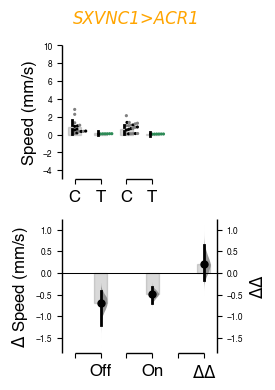

In [58]:
fSXVNC1CsCh_Vcontrast, SXVNC1CsCh_Vcontrast = plotcontrast(SXVNC1CsCh, 'Volume', 'SXVNC1CsCh_Vcontrast',  swarm_ylim = [-5, 850],palette = SXVNC1CsChpalette, title= 'SXVNC1>Chr')
fSXVNC1CsCh_MScontrast, SXVNC1CsCh_MScontrast = plotcontrast(SXVNC1CsCh, 'Meal Size', 'SXVNC1CsCh_MScontrast', swarm_label = 'Meal Size (nL)',  swarm_ylim = [-5, 210], palette = SXVNC1CsChpalette, title= 'SXVNC1>Chr')
fSXVNC1CsCh_Spcontrast, SXVNC1CsCh_Spcontrast = plotcontrast(SXVNC1CsCh, 'Speed', 'SXVNC1CsCh_Spcontrast', swarm_label = 'Speed (mm/s)',swarm_ylim = [-5, 10], palette = SXVNC1CsChpalette, title= 'SXVNC1>Chr')

fSXVNC1ACR1_Vcontrast, SXVNC1ACR1_Vcontrast = plotcontrast(SXVNC1ACR1, 'Volume', 'SXVNC1ACR1_Vcontrast', swarm_ylim = [-5, 850], palette = SXVNC1ACR1palette, title= 'SXVNC1>ACR1')
fSXVNC1ACR1_MScontrast, SXVNC1ACR1_MScontrast = plotcontrast(SXVNC1ACR1, 'Meal Size', 'SXVNC1ACR1_Vcontrast', swarm_label = 'Meal Size (nL)',  swarm_ylim = [-5, 210], palette = SXVNC1ACR1palette, title= 'SXVNC1>ACR1')
fSXVNC1ACR1_Spcontrast, SXVNC1ACR1_Spcontrast = plotcontrast(SXVNC1ACR1, 'Speed', 'SXVNC1ACR1_Spcontrast', swarm_label = 'Speed (mm/s)',swarm_ylim = [-5, 10], palette = SXVNC1ACR1palette, title= 'SXVNC1>ACR1')




/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 6.2% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 24.4% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 45.6% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 10.4% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools

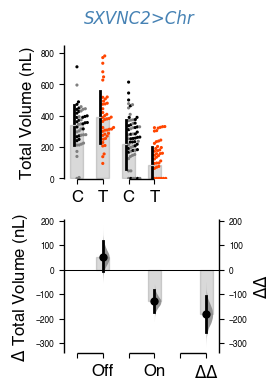

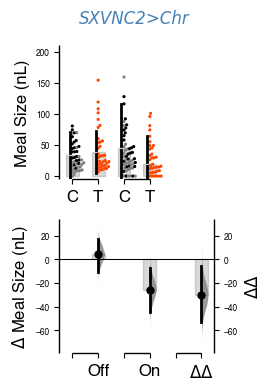

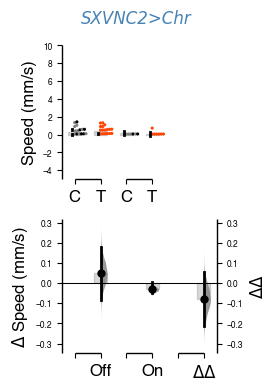

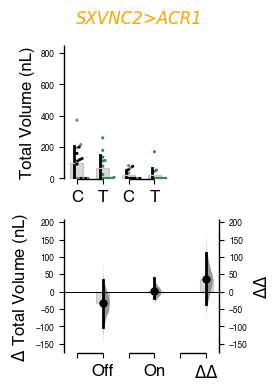

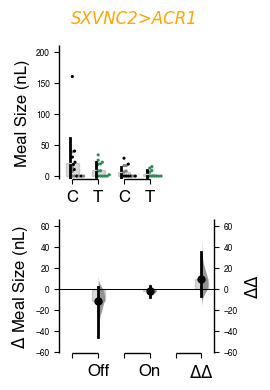

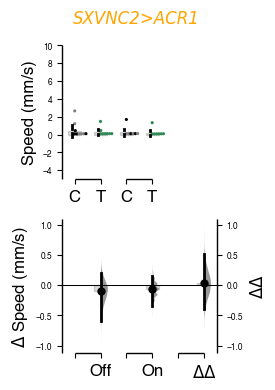

In [59]:
fSXVNC2CsCh_Vcontrast, SXVNC2CsCh_Vcontrast = plotcontrast(SXVNC2CsCh, 'Volume', 'SXVNC2CsCh_Vcontrast', swarm_ylim = [-5, 850], palette = SXVNC2CsChpalette, title= 'SXVNC2>Chr')
fSXVNC2CsCh_MScontrast, SXVNC2CsCh_MScontrast = plotcontrast(SXVNC2CsCh, 'Meal Size', 'SXVNC2CsCh_MScontrast', swarm_label = 'Meal Size (nL)',  swarm_ylim = [-5, 210], palette = SXVNC2CsChpalette, title= 'SXVNC2>Chr')
fSXVNC2CsCh_Spcontrast, SXVNC2CsCh_Spcontrast = plotcontrast(SXVNC2CsCh, 'Speed', 'SXVNC2CsCh_Spcontrast', swarm_label = 'Speed (mm/s)',swarm_ylim = [-5, 10], palette = SXVNC2CsChpalette, title= 'SXVNC2>Chr')

fSXVNC2ACR1_Vcontrast, SXVNC2ACR1_Vcontrast = plotcontrast(SXVNC2ACR1, 'Volume', 'SXVNC2ACR1_Vcontrast',  swarm_ylim = [-5, 850],palette = SXVNC2ACR1palette, title='SXVNC2>ACR1')
fSXVNC2ACR1_MScontrast, SXVNC2ACR1_MScontrast = plotcontrast(SXVNC2ACR1, 'Meal Size', 'SXVNC2ACR1_Vcontrast', swarm_label = 'Meal Size (nL)',  swarm_ylim = [-5, 210], palette = SXVNC2ACR1palette, title= 'SXVNC2>ACR1')
fSXVNC2ACR1_Spcontrast, SXVNC2ACR1_Spcontrast = plotcontrast(SXVNC2ACR1, 'Speed', 'SXVNC2ACR2_Spcontrast', swarm_label = 'Speed (mm/s)',swarm_ylim = [-5, 10], palette = SXVNC2ACR1palette, title= 'SXVNC2>ACR1')




/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 8.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


[24]
[0]


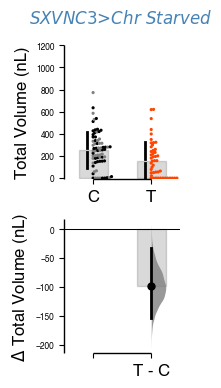

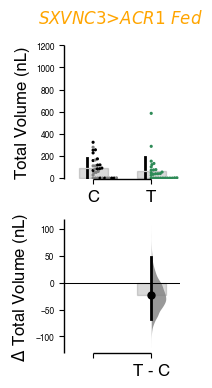

In [60]:
SXVNC3palette = {'SXVNC3>Chr': 'orangered', 'CsCh/w': 'gray', 'SXVNC3/w': 'k', 'SXVNC3>ACR1': 'seagreen', 'ACR1/w': 'gray', 'SXVNC3/w': 'k'}

# SXVNC3ACR11 = SXVNC3ACR1.loc[SXVNC3ACR1['date'] == '2024-04-19_14-18-52']
# SXVNC3 = pd.concat([SXVNC3CsCh, SXVNC3ACR1], axis = 0)
fSXVNC3CsCh_Vcontrast, SXVNC3CsCh_Vcontrast = plot2contrast(SXVNC3CsCh, 'Volume', 'SXVNC3CsCh_Vcontrast', palette = SXVNC3CsChpalette, title= '$SXVNC3$>$Chr$ Starved')
fSXVNC3ACR1_Vcontrast, SXVNC3ACR1_Vcontrast = plot2contrast(SXVNC3ACR1, 'Volume', 'SXVNC3ACR1_Vcontrast', palette = SXVNC3ACR1palette, title= '$SXVNC3$>$ACR1$ Fed')
# print(SXVNC3palette)
# print(SXVNC3.GenoReduced.unique())

In [61]:
cschV = [TrhBrain_Vcontrast, TrhVNCCsCh_Vcontrast, SXVNC1CsCh_Vcontrast,SXVNC2CsCh_Vcontrast]
acrV = [TrhVNCACR_Vcontrast, SXVNC1ACR1_Vcontrast,SXVNC2ACR1_Vcontrast]
cschMS = [TrhBrain_MScontrast, TrhVNCCsCh_MScontrast, SXVNC1CsCh_MScontrast,SXVNC2CsCh_MScontrast]
acrMS = [TrhVNCACR_MScontrast, SXVNC1ACR1_MScontrast,SXVNC2ACR1_MScontrast]
cschSp = [TrhBrain_Spcontrast, TrhVNCCsCh_Spcontrast, SXVNC1CsCh_Spcontrast,SXVNC2CsCh_Spcontrast]
acrSp = [TrhVNCACR_Spcontrast, SXVNC1ACR1_Spcontrast,SXVNC2ACR1_Spcontrast]
sx3cschV = SXVNC3CsCh_Vcontrast
sv3acrV= SXVNC3ACR1_Vcontrast

# sx3cschV = SXVNC3CsCh_MScontrast
# sv3acrV= SXVNC3ACR1_MScontrast


NameError: name 'TrhBrain_MScontrast' is not defined

In [ ]:
figurepath = imagepath + 'Figure4/'
icks = [0, 1, 2, 3, 4, 5, 6, 7, 8]
effects = ['d', 'd', 'dd', 'dd', 'dd', 'dd',  'dd', 'dd', 'dd']
colors = ['orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered',  'seagreen', 'seagreen', 'seagreen']
newcontrasts = [ RLTG_Vcontrast, TLRG_Vcontrast,TrhBrain_Vcontrast, TrhVNCCsCh_Vcontrast, SXVNC1CsCh_Vcontrast,SXVNC2CsCh_Vcontrast, TrhVNCACR_Vcontrast, SXVNC1ACR1_Vcontrast,SXVNC2ACR1_Vcontrast]
exptNames = [ 'Trhn-NOT-R50H05>Chr', 
             'R50H05-NOT-Trhn>Chr',
             'Trhn-NOT-tsh>Chr', 
             'Trhn-AND-tsh>Chr',
             'SXVNC1>Chr',
             'SXVNC2>Chr', 
             'Trhn-AND-tsh>ACR1', 
             'SXVNC1>ACR1',
             'SXVNC2>ACR1', 
]

setFont('inter', 12) 
f, axes = plt.subplots(2, 1, figsize = (8, 5))
f.subplots_adjust( hspace=0)
axes[0].plot([-.5, 8.5], [0, 0], 'k', linewidth = 1)
trhbca = pd.read_csv('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/Figures20240202/Figure3/panels and data/trhbca.csv')
axes[0].fill_between([-.5, 8.5], [trhbca.iloc[0, 2], trhbca.iloc[0, 2]], [trhbca.iloc[0, 1], trhbca.iloc[0, 1]], color = 'orangered', alpha = 0.1)
axes[0].fill_between([-.5, 8.5], [trhbca.iloc[1, 2], trhbca.iloc[1, 2]], [trhbca.iloc[1, 1], trhbca.iloc[1, 1]], color = 'seagreen', alpha = 0.1)
axes[0].text(-.25, trhbca.iloc[0, 1:3].mean(), 'Trhn>Chr',  color = 'orangered', va = 'center')
axes[0].text(-.25, trhbca.iloc[1, 1:3].mean(), 'Trhn>ACR', color = 'seagreen', va = 'center')
effectsizes = []
samplesizes = []
for i in ticks:
    c = newcontrasts[i]
    default_violinplot_kwargs = {'widths':0.5, 'vert':True,'showextrema':False, 'showmedians':False}
    if effects[i] == 'dd':
        v = axes[0].violinplot(c.mean_diff.delta_delta.bootstraps_delta_delta, positions=[i], **default_violinplot_kwargs)
        axes[0].plot(i, c.mean_diff.delta_delta.difference, 'k.', markersize = 12)
        axes[0].plot([i, i], [c.mean_diff.delta_delta.bca_low, c.mean_diff.delta_delta.bca_high], 'k', linewidth = 1.5)
        effectsizes.append([c.mean_diff.delta_delta.difference, c.mean_diff.delta_delta.bca_low, c.mean_diff.delta_delta.bca_high])
        # effectsizes.append([c.mean_diff.delta_delta.difference, c.mean_diff.delta_delta.bca_low, c.mean_diff.delta_delta.bca_high])
    else:
        v = axes[0].violinplot(c.mean_diff.results.bootstraps[0], positions=[i], **default_violinplot_kwargs)
        axes[0].plot(i, c.mean_diff.results.difference[0], 'k.', markersize = 12)
        axes[0].plot([i, i], [c.mean_diff.results.bca_low[0], c.mean_diff.results.bca_high[0]], 'k', linewidth = 1.5)
        effectsizes.append([c.mean_diff.results.difference[0], c.mean_diff.results.bca_low[0], c.mean_diff.results.bca_high[0]])

    dabest.plot_tools.halfviolin(v, alpha = 0.4)
    axes[0].collections[i+2].set_fc(colors[i])
    # axes[0].set_xticks(range(0, 9),[ 'R50H05-Not-Trhn>Chr Fed', 'Trhn-NOT-R50H05>Chr Starved', 'Trhn-NOT-tsh>Chr Starved', 'Trhn-AND-tsh>Chr Starved', 'SXVNC1>Chr Starved', 'SXVNC2>Chr Starved',  'Trhn-AND-tsh>ACR1 Fed', 'SXVNC1>ACR1 Fed', 'SXVNC2>ACR1 Fed'], ha = 'right', rotation = 35)    
axes[0].set_xticks([])
axes[0].set_ylabel('$\Delta$ Volume')
axes[0].set_xlim(-.5, 8.5)
# axes[0].set_title('VNC driver line effects')
xtl = axes[0].get_xticklabels()    
for x in xtl:
    x.set_style('italic')   
effectsizesDf = pd.DataFrame(np.transpose(effectsizes), columns = exptNames, index = ['mean', 'bca_low', 'bca_high'])
effectsizes_str = [str(int(e)) for e in effectsizesDf.loc['mean'].values]
no = 'NOT'
yes = u'\u26AB'
axes[1].axis('off')
setFont('inter', 10)
tablevalues = [['S', 'F', 'S', 'S', 'S', 'S', 'F', 'F', 'F',], 
               [ yes, no, yes, yes, '', '',  yes, '', '', ], 
               [ no, yes, '', '', '', '', '', '',''], 
               ['', '', no, yes, '', '', yes, '',  ''], 
               ['', '', '', '',  yes, '', '', yes, ''], 
               ['', '', '', '',  '', yes, '', '', yes], 
               [yes, yes, yes, yes, yes, yes, '', '', ''], 
               ['', '', '', '', '', '', yes, yes, yes],
               effectsizes_str,]
tablevalues
rtable = axes[1].table( cellText=tablevalues,
            colWidths=[0.10]*9,
            rowLabels=['State', '$\\it{Trhn}$', '$\\it{R50H05}$', '$\\it{tsh}$', 'SXVNC1', 'SXVNC2', '$\\it{Chr}$', '$\\it{ACR1}$', u'\u0394' + '\\' +u'\u0394' + u'\u0394'], 
                       loc = 'center',cellLoc='center',
          bbox=[0, 0, 1, 1])
rtable.auto_set_font_size(False)
rtable.set_fontsize(11)



f.savefig(figurepath + 'VNCVforestplot.svg', bbox_inches='tight')
f.savefig(figurepath + 'VNCVforestplot.png',bbox_inches='tight', dpi = 300)
effectsizesDf.insert(0, '', effectsizesDf.index)

# write_results_table(SPREADSHEET_ID, 'Figure 4 Forest', effectsizesDf, sheet = 'Figure 4', starting_row = None)

# 'R50H05-Not-Trhn>Chr Fed', 
# 'Trhn-NOT-R50H05>Chr Starved', 
# 'Trhn-NOT-tsh>Chr Starved', 
# 'Trhn-AND-tsh>Chr Starved', 
# 'SXVNC1>Chr Starved', 
# 'SXVNC2>Chr Starved',
# 'Trhn-AND-tsh>ACR1 Fed',
# 'SXVNC1>ACR1 Fed', 
# 'SXVNC2>ACR1 Fed'


# 

###### 

In [177]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

Fontconfig warning: ignoring UTF-8: not a valid region tag


['/opt/X11/share/system_fonts/Supplemental/Georgia Bold Italic.ttf',
 '/Users/sangyuxu/Library/Fonts/InterDisplay-ThinItalic.ttf',
 '/opt/X11/share/system_fonts/Avenir Next.ttc',
 '/System/Library/Fonts/Apple Braille.ttf',
 '/System/Library/Fonts/Monaco.ttf',
 '/opt/X11/share/system_fonts/Supplemental/Trebuchet MS.ttf',
 '/opt/X11/share/system_fonts/Supplemental/Microsoft Sans Serif.ttf',
 '/opt/X11/share/system_fonts/SFArabicRounded.ttf',
 '/Users/sangyuxu/Library/Fonts/Inter-ExtraBoldItalic.ttf',
 '/System/Library/Fonts/ヒラギノ角ゴシック W9.ttc',
 '/System/Library/Fonts/Supplemental/Bodoni 72 OS.ttc',
 '/Users/sangyuxu/Library/Fonts/SanJiDianHeiJianTi-Zhong-2.ttf',
 '/opt/X11/share/system_fonts/Supplemental/STIXSizFourSymReg.otf',
 '/System/Library/Fonts/ADTNumeric.ttc',
 '/opt/X11/share/system_fonts/Supplemental/NotoSansSaurashtra-Regular.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansElbasan-Regular.ttf',
 '/opt/X11/share/system_fonts/Supplemental/Rockwell.ttc',
 '/System/Library/Fon